# Empirical Survival Function Coverage Results

Notebook with coverage results on simulated data, using the empirical survival function as the survival function estimator.

Jimmy Butler

In [103]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(ggpubr)

In [104]:
save_path <- '/global/homes/j/jbbutler/isolines_uq/outputs/plots'

In [105]:
# suppress scientific notation
options(scipen = 999)

In [106]:
res_df <- read.csv('~/isolines_uq/outputs/simulations/empirical_coverage.csv')
full_res <- res_df %>% group_by(dist, p, n, alpha) %>% summarize(covrate=mean(is_covered))

meta_alpha <- 0.05
uncertainty <- qnorm(1-(meta_alpha/2))*(sqrt((full_res$covrate*(1-full_res$covrate))/500))
uncertainty <- round(uncertainty, 3)
full_res$uncertainty <- uncertainty

# good results: where empirical survival function performs well
good_res <- full_res %>% filter(p > 0.0001)
# bad results: where empirical survival function doesn't perform well
bad_res <- full_res %>% filter(p == 0.0001)

`summarise()` has grouped output by 'dist', 'p', 'n'. You can override using
the `.groups` argument.


In [107]:
TITLE_FONTSIZE <- 16
AXIS_FONTSIZE <- 15
LEGEND_FONTSIZE <- 15
AX_TITLE_FONTSIZE <- 15

DISPLAY_HEIGHT <- 5
DISPLAY_WIDTH <- 14

plt_coverages <- function(a, dist, title, res) {

    plt <- ggplot(res %>% filter(alpha==a, dist==distn), aes(color=as.factor(p))) + 
    geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
    geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
    xlab('Sample Size') + ylab('Coverage Rate') +
    geom_point(aes(x=as.factor(n), y=covrate), position=position_dodge(width=0.5)) + theme_light() + 
    ggtitle(paste0(title, ' ', (1-a)*100, '%')) + 
    guides(color=guide_legend(title='p = ')) +
    theme(legend.title=element_text(size=LEGEND_FONTSIZE), 
          legend.background=element_rect(color = "black", linewidth = 0.5, linetype = "solid"), 
          legend.position=c(0.8,0.2),
          axis.text.x=element_text(size=AXIS_FONTSIZE), 
          axis.text.y=element_text(size=AXIS_FONTSIZE),
          axis.title.x=element_text(size=AX_TITLE_FONTSIZE), 
          axis.title.y=element_text(size=AX_TITLE_FONTSIZE), 
          plot.title = element_text(size=TITLE_FONTSIZE),
          legend.text=element_text(size=LEGEND_FONTSIZE))

    return(plt)
}

## Bivariate t

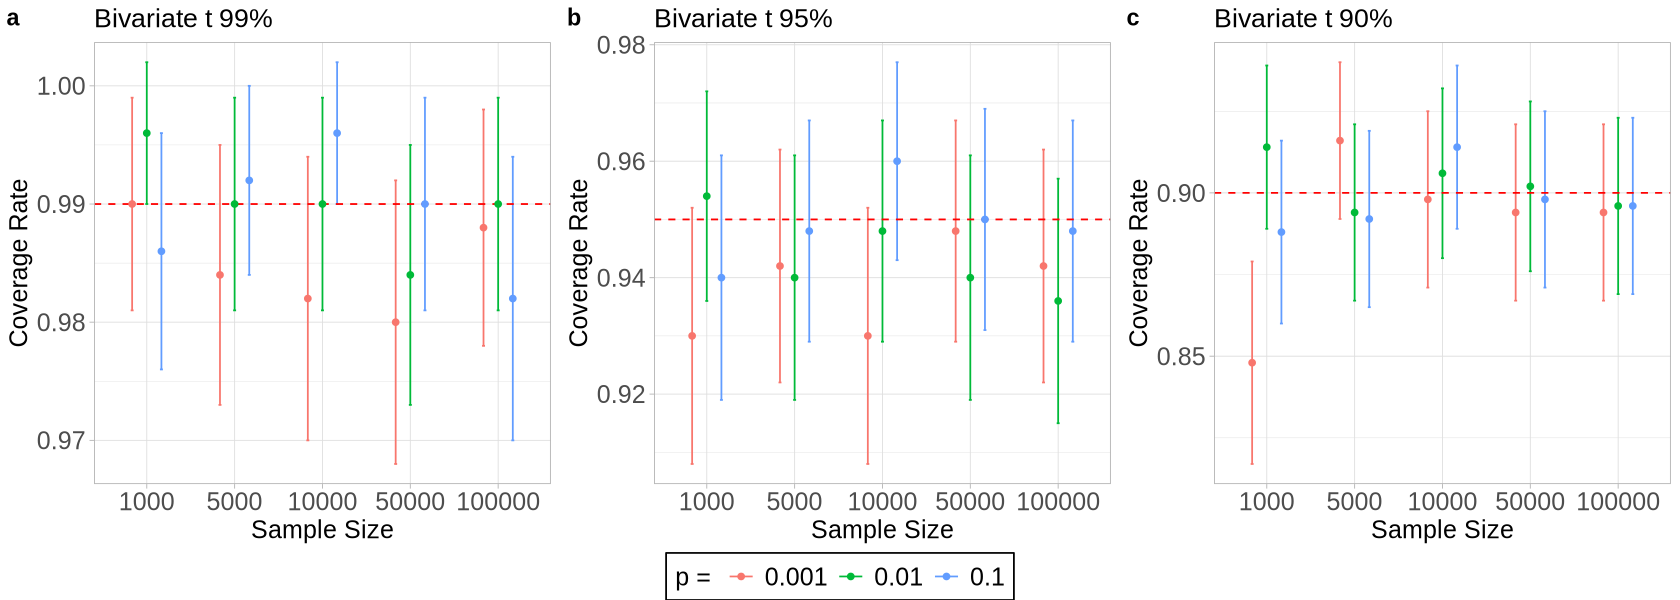

In [108]:
options(repr.plot.width=DISPLAY_WIDTH, repr.plot.height=DISPLAY_HEIGHT)

distn <- 'bivt'
title <- 'Bivariate t'

plt1 <- plt_coverages(0.01, , title, good_res)
plt2 <- plt_coverages(0.05, distn, title, good_res)
plt3 <- plt_coverages(0.1, distn, title, good_res)

plt <- ggarrange(plt1, plt2, plt3, 
                 ncol = 3, nrow = 1, 
                 labels = c("a", "b", "c"),
                 common.legend = TRUE, 
                 legend = "bottom")

plt
ggsave('bivt_empirical.png', plot=plt, height=DISPLAY_HEIGHT, width=DISPLAY_WIDTH, path=save_path, dpi=300)

## Bivariate Gaussian

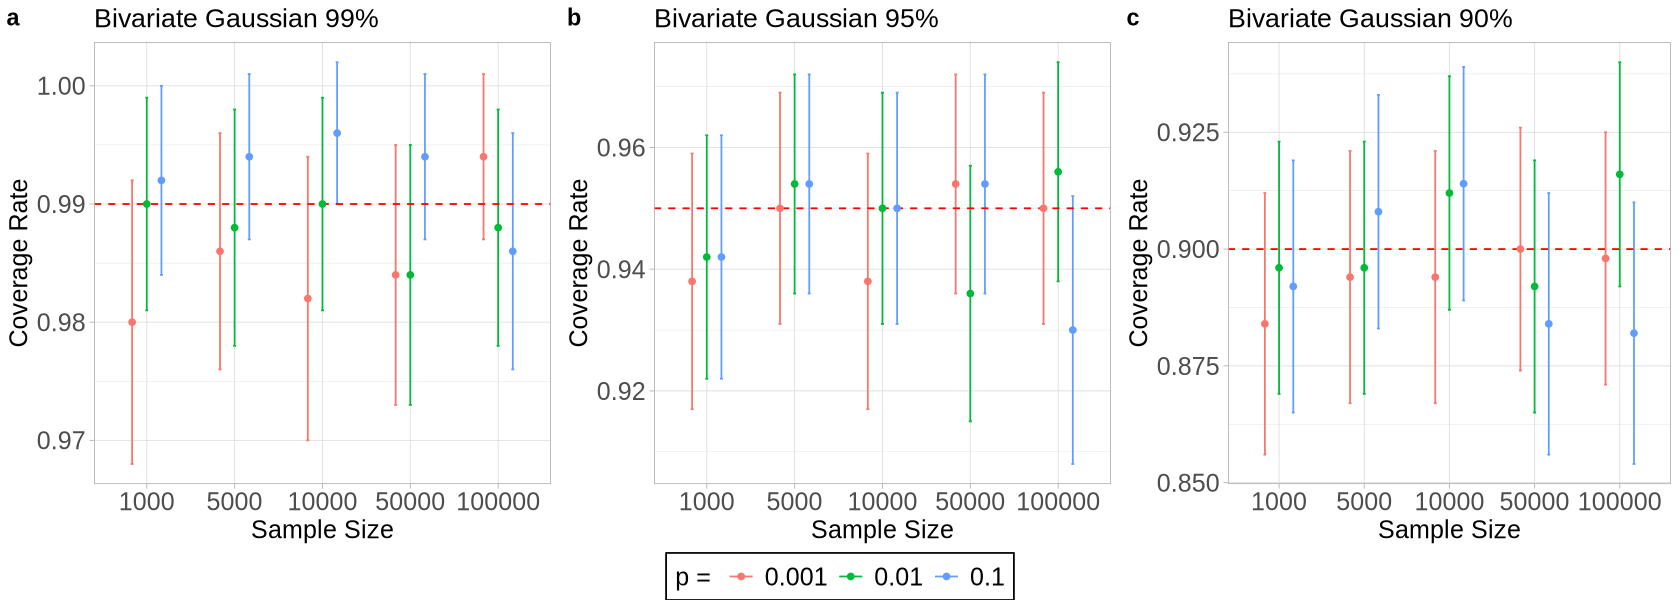

In [109]:
distn <- 'bivgauss'
title <- 'Bivariate Gaussian'

options(repr.plot.width=14, repr.plot.height=5)
plt1 <- plt_coverages(0.01, distn, title, good_res)
plt2 <- plt_coverages(0.05, distn, title, good_res)
plt3 <- plt_coverages(0.1, distn, title, good_res)

plt <- ggarrange(plt1, plt2, plt3, 
                 ncol = 3, nrow = 1, 
                 labels = c("a", "b", "c"),
                 common.legend = TRUE, 
                 legend = "bottom")

plt
ggsave('bivgauss_empirical.png', plot=plt, path=save_path, height=DISPLAY_HEIGHT, width=DISPLAY_WIDTH, dpi=300)

## Karachi

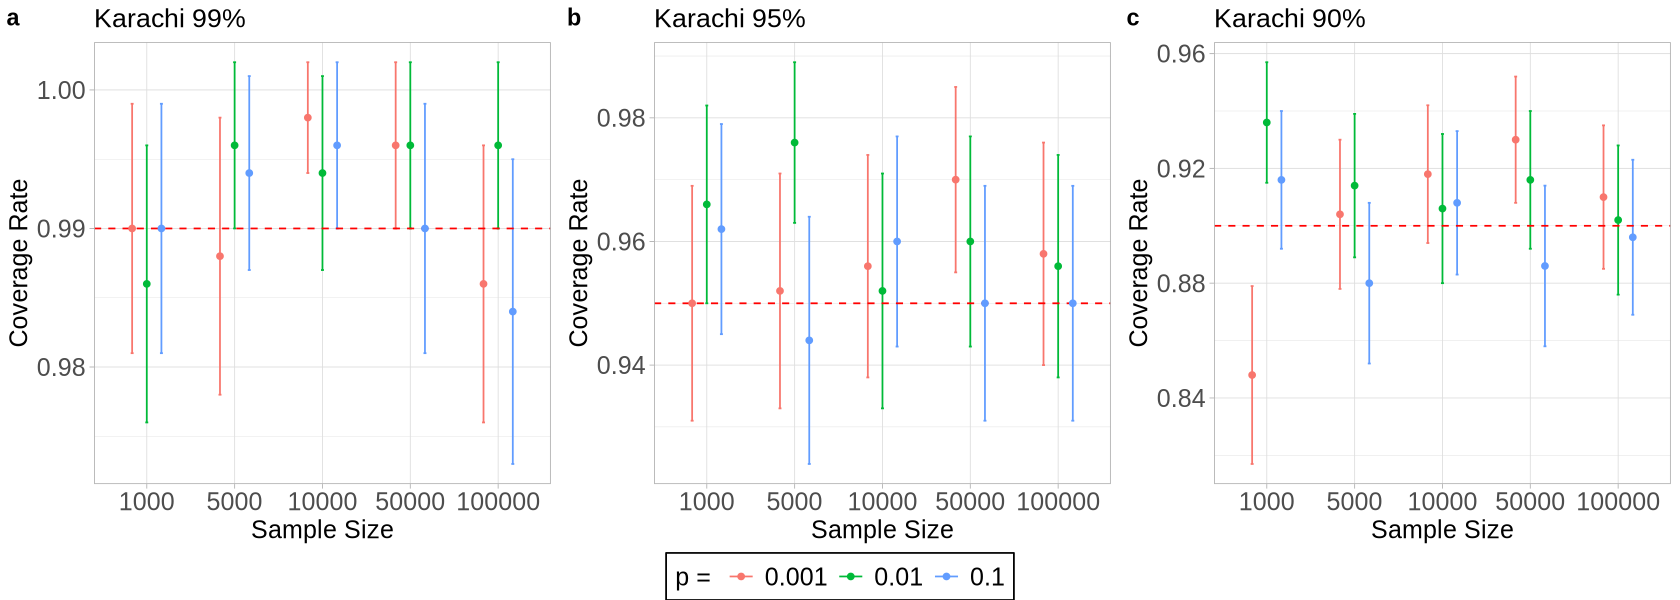

In [110]:
distn <- 'karachi'
title <- 'Karachi'

options(repr.plot.width=DISPLAY_WIDTH, repr.plot.height=DISPLAY_HEIGHT)
plt1 <- plt_coverages(0.01, distn, title, good_res)
plt2 <- plt_coverages(0.05, distn, title, good_res)
plt3 <- plt_coverages(0.1, distn, title, good_res)

plt <- ggarrange(plt1, plt2, plt3, 
                 ncol = 3, nrow = 1, 
                 labels = c("a", "b", "c"),
                 common.legend = TRUE, 
                 legend = "bottom")
plt
ggsave('bivkarachi_empirical.png', plot=plt, path=save_path, height=DISPLAY_HEIGHT, width=DISPLAY_WIDTH, dpi=300)

Now, let's plot the coverage for $p=0.0001$. This will exemplify where the empirical survival function fails in creating confidence tubes with proper coverage. As can be seen from the plots, for smaller $n$, the coverage is pretty abysmal, but it improves as $n$ gets larger. This makes sense as the empirical survival function is just the data: for $n = 1000$, there are not enough data points to get a good estimate of the $0.0001$ isoline, and thus we should not expect the coverage to be good.

In [114]:
plt_bad <- function(a, res, distn) {
    plt <- ggplot(res %>% filter(alpha==a, p==0.0001), aes(color=as.factor(dist))) + 
        geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                      ymax=covrate+uncertainty, color=as.factor(dist)), width=.5, 
                    position=position_dodge(width=0.5)) + 
        geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
        xlab('Sample Size') + ylab('Coverage Rate') +
        geom_point(aes(x=as.factor(n), y=covrate), position=position_dodge(width=0.5), size=2) + theme_light() + 
        ggtitle(paste0('p = 0.0001, ', (1-a)*100, '%')) + 
        guides(color=guide_legend(title='')) +
        theme(legend.title=element_text(size=LEGEND_FONTSIZE), 
              legend.background=element_rect(color = "black", linewidth = 0.5, linetype = "solid"), 
              legend.position=c(0.8,0.2),
              axis.text.x=element_text(size=AXIS_FONTSIZE), 
              axis.text.y=element_text(size=AXIS_FONTSIZE),
              axis.title.x=element_text(size=AX_TITLE_FONTSIZE), 
              axis.title.y=element_text(size=AX_TITLE_FONTSIZE), 
              plot.title = element_text(size=TITLE_FONTSIZE),
              legend.text=element_text(size=LEGEND_FONTSIZE))

    return(plt)
}

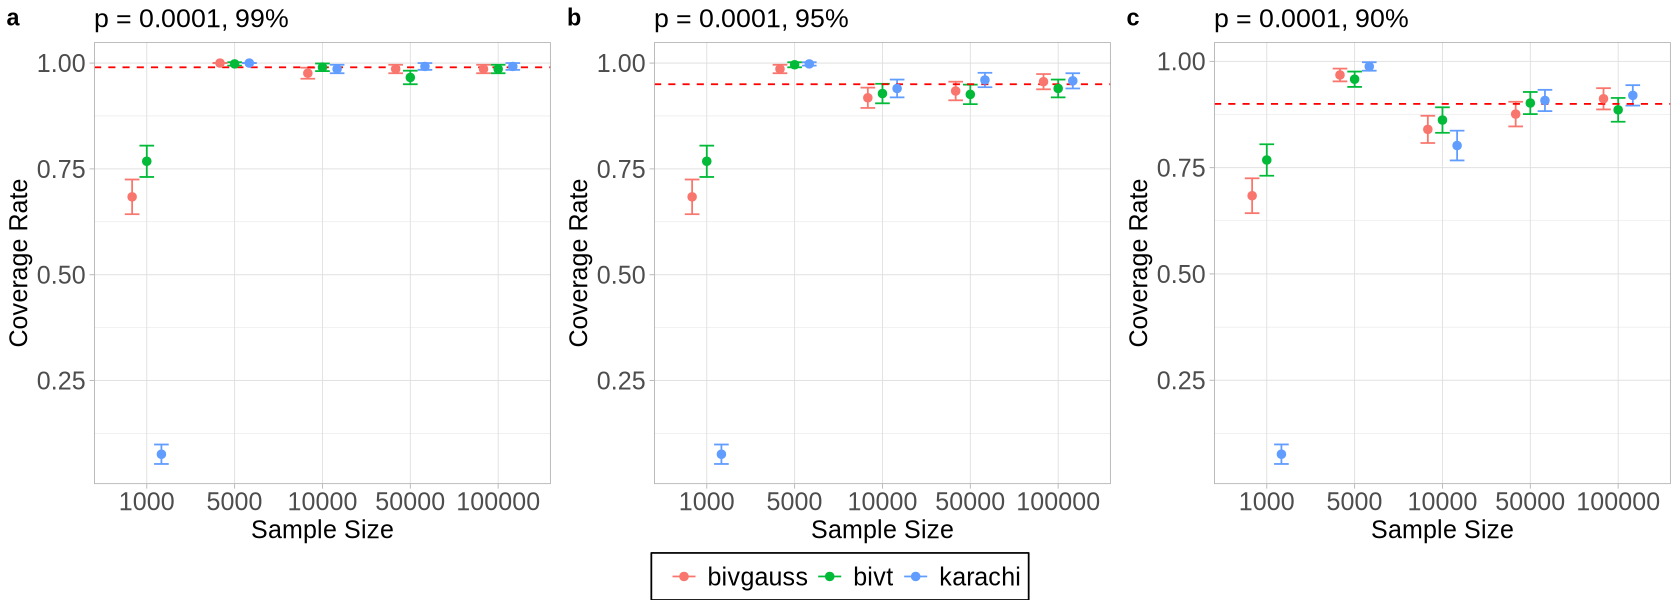

In [115]:
plt1 <- plt_bad(0.01, bad_res)
plt2 <- plt_bad(0.05, bad_res)
plt3 <- plt_bad(0.1, bad_res)

plt <- ggarrange(plt1, plt2, plt3, 
                 ncol = 3, nrow = 1, 
                 labels = c("a", "b", "c"),
                 common.legend = TRUE, 
                 legend = "bottom")
plt
ggsave('bad_empirical.png', plot=plt, path=save_path, height=DISPLAY_HEIGHT, width=DISPLAY_WIDTH, dpi=300)